In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



- **Question 7: ** Use the Fast Greedy community detection algorithm to find the communities in the movie network. Pick 10 communities and for each community plot the distribution of the genres of the movies in the community.

In [2]:
# create network using edgeList
edgeList <- read.csv(file="eggs_short.csv", header=FALSE, sep=",")
g <- graph_from_data_frame(edgeList, directed = FALSE)
# fg <- fastgreedy.community(g)

In [3]:
# read from saved communities
fg = read.csv("community.csv")
movie_genre = read.csv('movie_genre_ID.csv', sep=',')
genre_id = read.csv('genre_id.csv', sep=',')
genre_freq_total = read.csv('genre_freq.csv', sep=',')

 [1] "13" "8"  "1"  "1"  "25" "8"  "1"  "1"  "1"  "1" 
 [1] "13" "8"  "17" "4"  "25" "8"  "25" "1"  "28" "1" 


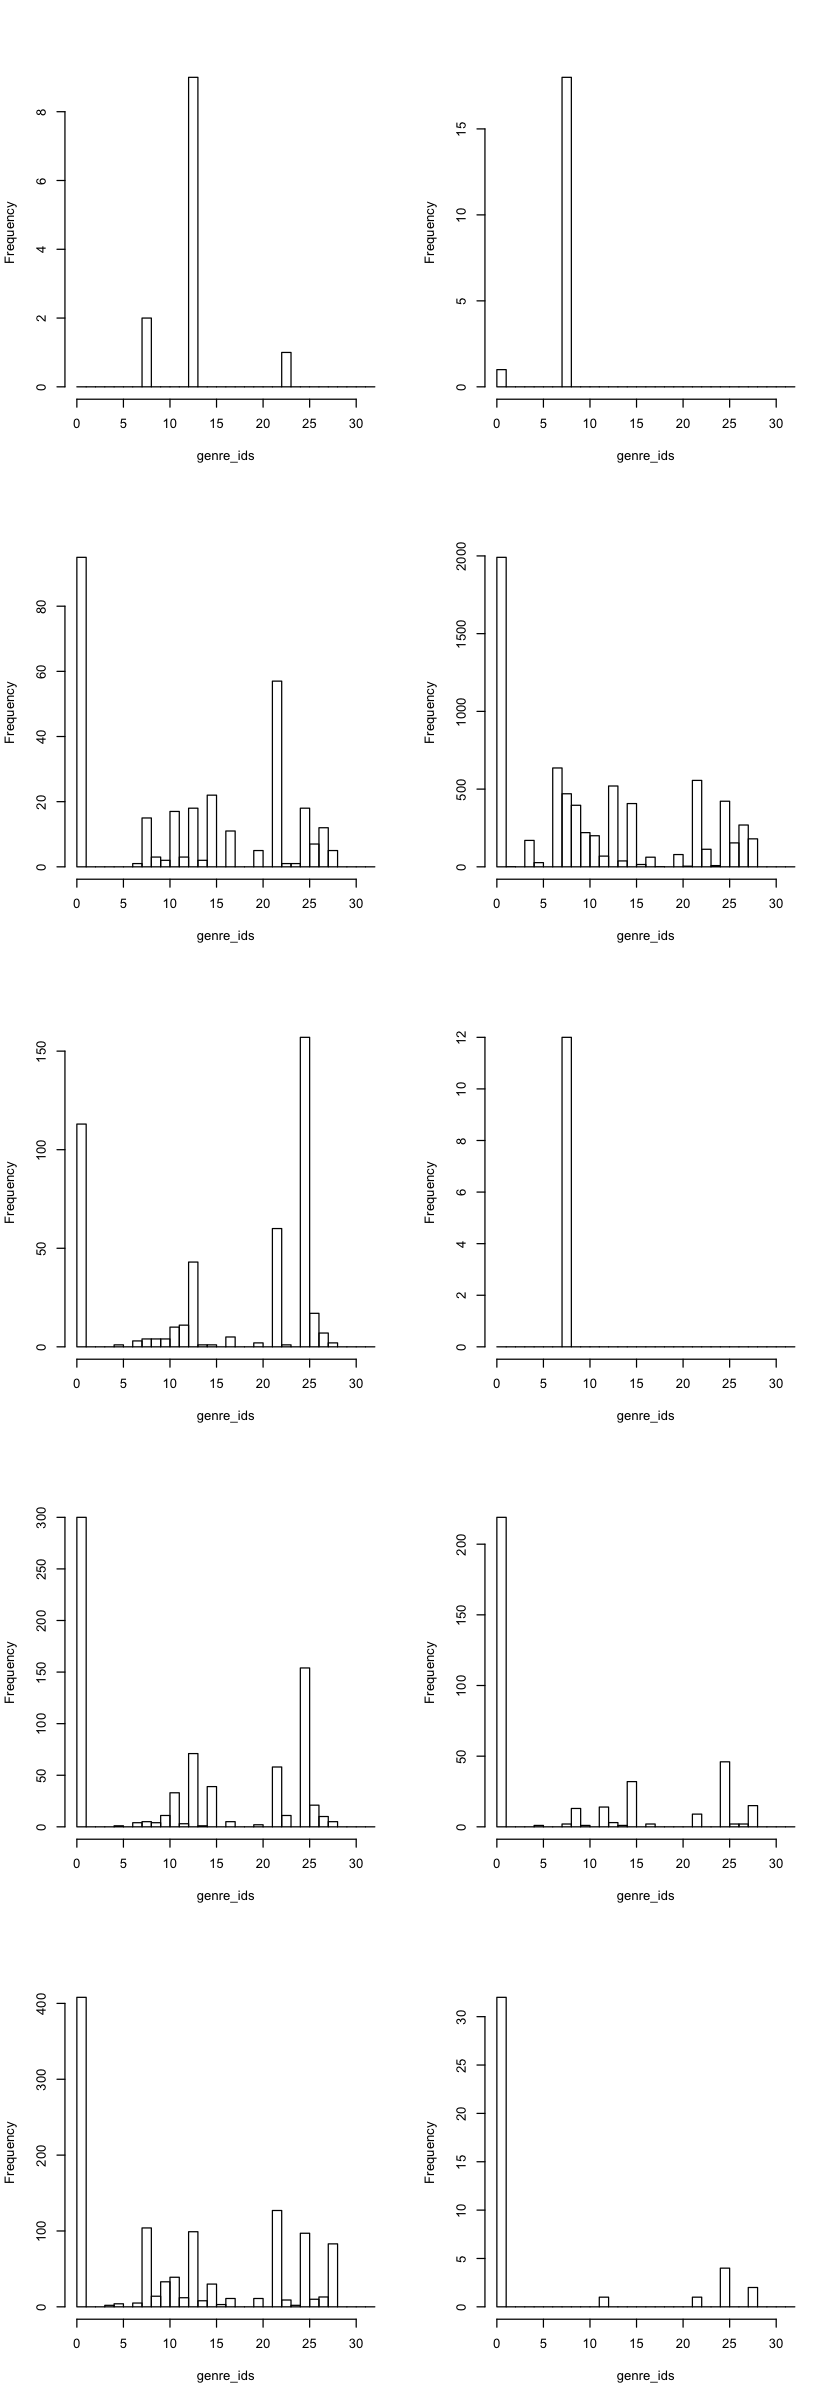

In [4]:
community_idx = sample(1:32, 10)
par(mfrow = c(5,2))
options(repr.plot.width=7, repr.plot.height=20)

max_fre_genres = c()
max_score_genres = c()
for (idx in community_idx){
    genre_ids <- c()
    member <- fg$member[which(fg$group==idx)]
    for (i in member) {
        if (i %in% movie_genre$movie_id) {
            genre_ids <- c(genre_ids, movie_genre$genre_id[which(movie_genre$movie_id==i)])
        }
    }
    hist(genre_ids, breaks=c(0:32), main='',)
    
    genre_set <- as.data.frame(table(genre_ids))
    com_size = length(genre_ids)
    max_score = -100
    for (i in genre_set$genre_ids) {
        gren_i_count = genre_set$Freq[which(genre_set$genre_ids == i)]
        frac_com = gren_i_count / com_size
        frac_data = genre_freq_total$freq[which(genre_freq_total$genre == i)]
        score = log(gren_i_count) * frac_com / frac_data
        if (score > max_score) {
            max_score_genre = i
            max_score = score
        }
    }    
    
    max_fre_genres <- c(max_fre_genres, names(sort(summary(as.factor(genre_ids)), decreasing=T)[1]))
    max_score_genres <- c(max_score_genres, max_score_genre)
}

print(max_fre_genres)
print(max_score_genres)

- **Question 8(a):** In each community determine the most dominant genre based simply on frequency counts. Which generes tend to be the most frequent dominant ones across communities and why?

In [5]:
max_fre_genres
max_genre = names(sort(summary(as.factor(max_fre_genres)), decreasing=T)[1])
print(genre_id$genre_name[genre_id$genre_id==max_genre]) # most frequent

[1] "13" "8"  "1"  "1"  "25" "8"  "1"  "1"  "1"  "1"

[1] Drama
29 Levels: Action Adult Adventure Animation Biography Comedy ... Western


- **Question 8(b):** In each community, for the i th genre assign a score of ln(c(i)) ∗ p(i) / q(i) where: c(i) is the number of movies belonging to genre i in the community; p(i) is the fraction of genre i movies in the community,and q(i) is the fraction of genre i movies in the entire data set. Now determine the most dominant genre in each communitiy based on the modified scores. What are your findings and how do they differ from the results in 8(a).

In [6]:
max_score_genres

[1] "13" "8"  "17" "4"  "25" "8"  "25" "1"  "28" "1"

- **Question 8(c):** Find a community of movies that has size between 10 and 20. Determine all the actors who acted in these movies and plot the corresponding bipartite graph (i.e. restricted to these particular movies and actors). Determine three most important actors and explain how they help form the community. Is there a correlation between these actors and the dominant genres you found for this community in 8(a) and 8(b).

In [7]:
movie_cast_id = read.table('movie_cast_id.csv', sep=',', header=TRUE, strip.white=TRUE)

In [8]:
communities_ <- c()
for (i in 1:32) {
    com_size = length(which(fg$group==i))
    if (com_size >= 10 && com_size <= 20) 
        communities_ <- c(communities_, i)
}
chosen_com = sample(communities_, 1)

In [9]:
movies <- c()
casts <- c()
chosen_com_movies = fg$member[which(fg$group == chosen_com)]
for (movie in chosen_com_movies) {
    if (movie %in% movie_cast_id$movie_id){
        cast = movie_cast_id$cast_id[which(movie_cast_id$movie_id==movie)]
        casts <- c(casts, cast)
        if (length(cast) != 0)
            for (i in 1:length(cast))
                movies <- c(movies, movie)
    }
}


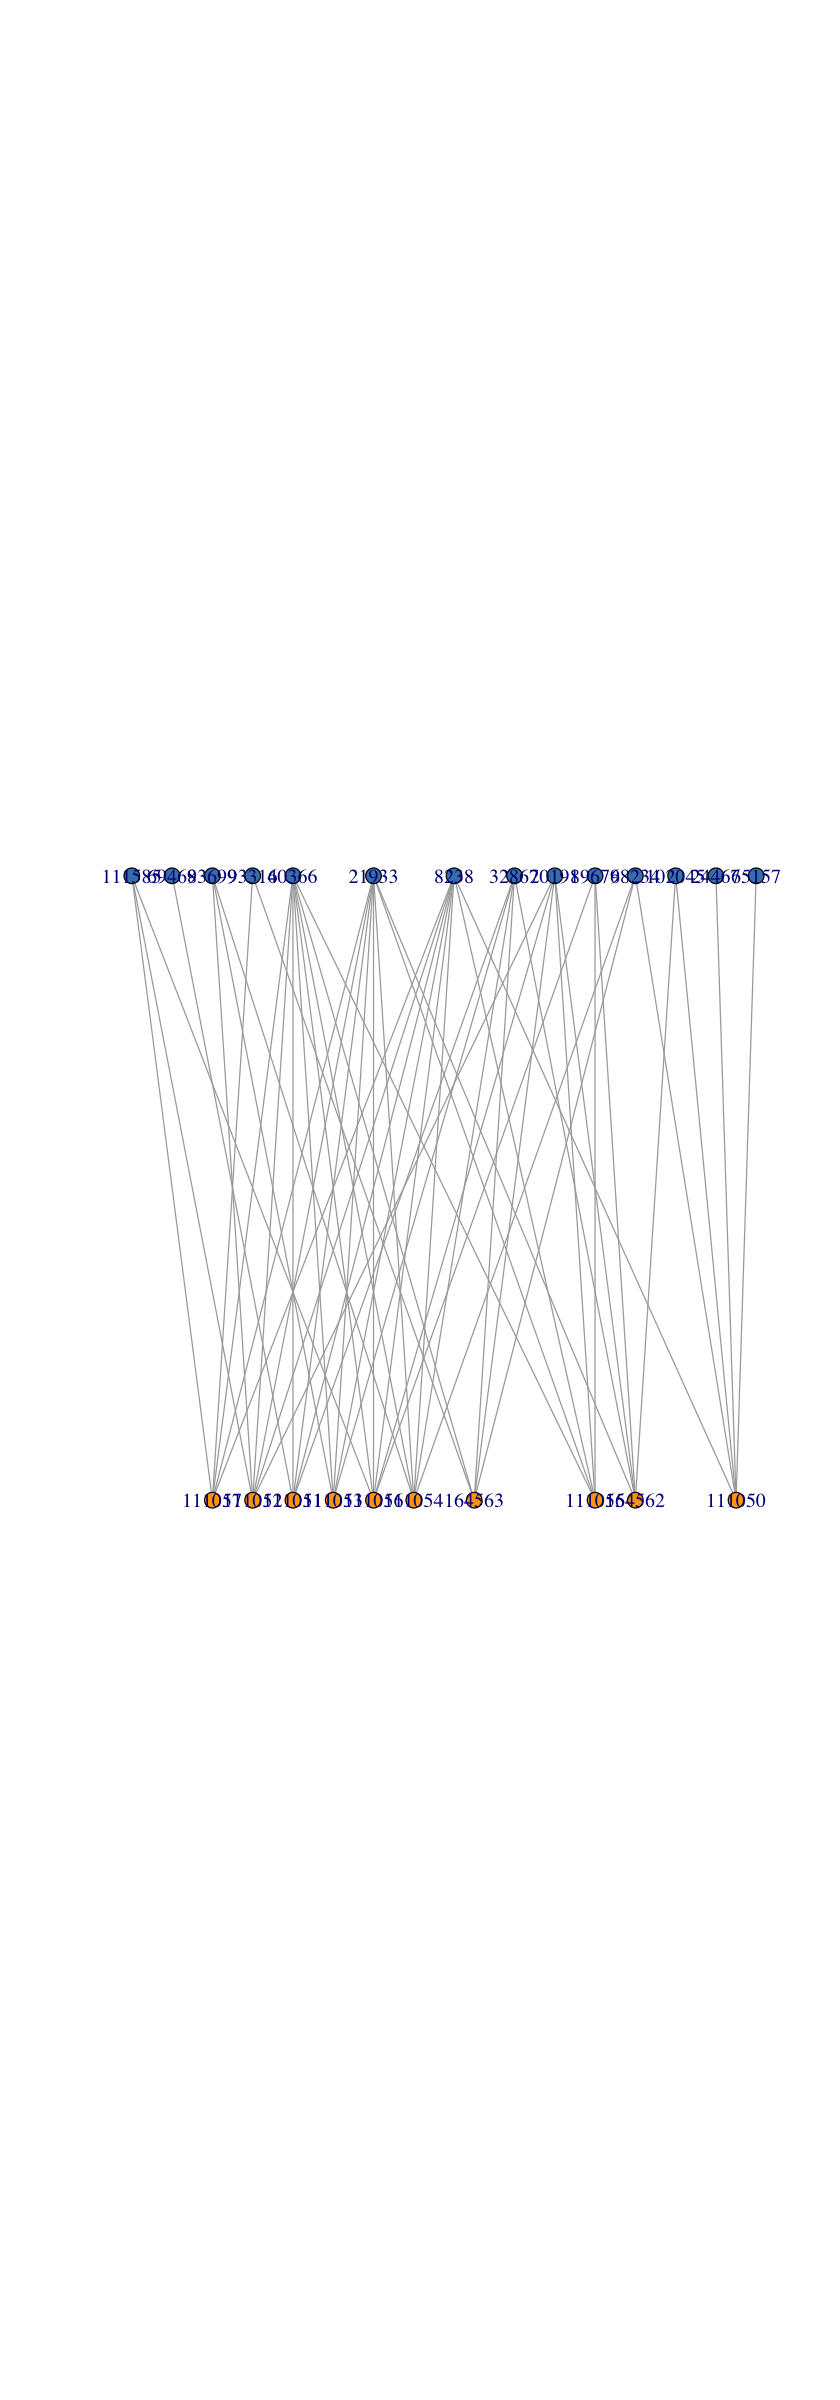

In [10]:
edge_list <- data.frame(S1=movies, S2=casts)
g_ <- graph.empty()
g_ <- add.vertices(g_,nv=length(unique(movies)), attr=list(name=paste0('',unique(movies)), type=rep(TRUE,length(unique(movies)))))
g_ <- add.vertices(g_,nv=length(unique(casts)), attr=list(name=paste0('',unique(casts)), type=rep(FALSE,length(unique(casts)))))
edgeListVec <- as.vector(t(as.matrix(data.frame(S1=paste0('',edge_list$S1), S2=paste0('',edge_list$S2)))))
g_ <- add.edges(g_,edgeListVec)
plot.igraph(g_, layout=layout.bipartite, vertex.color=c("steelblue", "orange")[V(g_)$type+1], 
            vertex.size=5, edge.arrow.size=0)